# R CIA

## Ipshita Ghosh 

## 16th March 2021

<hr>

## Libraries

In [15]:
# graph

library(ggplot2)

In [26]:
# correlation plot

library(psych)

In [34]:
# train-test split

library(caTools)

## Data

Reading the Data

In [111]:
data <- read.table("profits.txt",header=T,sep=',')

In [112]:
head(data)

R.D.Spend,Administration,Marketing.Spend,State,Profit
165349.2,136897.80,471784.1,New York,192261.8
162597.7,151377.59,443898.5,California,191792.1
153441.5,101145.55,407934.5,Florida,191050.4
144372.4,118671.85,383199.6,New York,182902.0
142107.3,91391.77,366168.4,Florida,166187.9
131876.9,99814.71,362861.4,New York,156991.1


Our target variable is ```Profit```

Looking at statistically summary of ```data```

In [113]:
print(summary(data))

   R.D.Spend      Administration   Marketing.Spend         State    
 Min.   :     0   Min.   : 51283   Min.   :     0   California:344  
 1st Qu.: 43085   1st Qu.:116641   1st Qu.:150970   Florida   :322  
 Median : 79936   Median :122422   Median :224518   New York  :334  
 Mean   : 81669   Mean   :122964   Mean   :226205                   
 3rd Qu.:124566   3rd Qu.:129139   3rd Qu.:308190                   
 Max.   :165349   Max.   :321652   Max.   :471784                   
     Profit      
 Min.   : 14681  
 1st Qu.: 85943  
 Median :117642  
 Mean   :119546  
 3rd Qu.:155577  
 Max.   :476485  


Since linear regression wont work with NA values, hence we check

In [114]:
any(is.na(data))

[1] FALSE

We dont have any NA values

<hr>

Grouping all numeric variables together and keeping in a dataframe

In [115]:
numeric.cols<-sapply(data,is.numeric)

In [116]:
numeric.cols

R.D.Spend  Administration Marketing.Spend           State          Profit 
           TRUE            TRUE            TRUE           FALSE            TRUE

In [117]:
numdata<-cor(data[,numeric.cols])

Making dataframe

In [118]:
data2 <- data[,numeric.cols]

In [119]:
head(numdata)

,R.D.Spend,Administration,Marketing.Spend,Profit
R.D.Spend,1.0000000,0.5824338,0.9784066,0.9452453
Administration,0.5824338,1.0000000,0.5204649,0.7415603
Marketing.Spend,0.9784066,0.5204649,1.0000000,0.9172702
Profit,0.9452453,0.7415603,0.9172702,1.0000000


<hr>

Correlation Plot

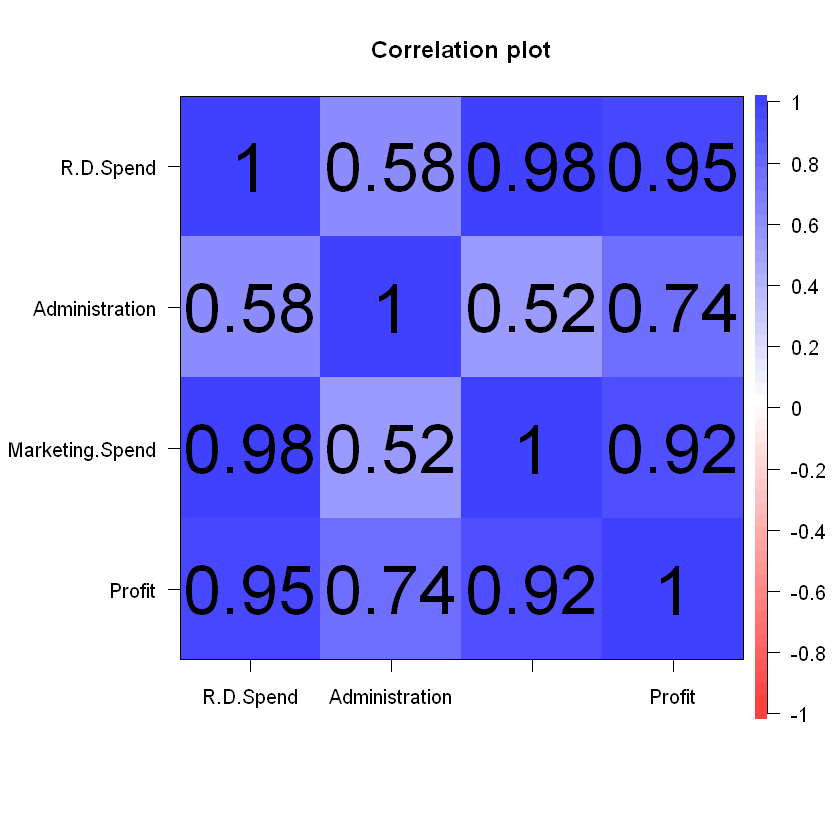

In [120]:
corPlot(data2)

### Inference:
We can see that all the variables are correlated with each other, but the variables showing **marketing expenditure** and **R&D Expenditure** are more correltated to *Profit*.

Hence, we will build two models one with all the data and one with above 90 score. The model with more $R^2$ will be selected for further process

<hr>

## Modelling

Splitting data into 70 and 30 

In [121]:
msk<-sample.split(data$Profit,SplitRatio = 0.7)

In [123]:
train=data[msk==TRUE, ]
test=data[msk==FALSE, ]

Dropping ```state``` from train and test

In [124]:
train = subset(train, select = -c(State) )
test = subset(train, select = -c(State) )

In [125]:
head(train)

,R.D.Spend,Administration,Marketing.Spend,Profit
1,165349.2,136897.80,471784.1,192261.8
2,162597.7,151377.59,443898.5,191792.1
3,153441.5,101145.55,407934.5,191050.4
5,142107.3,91391.77,366168.4,166187.9
7,134615.5,147198.87,127716.8,156122.5
8,130298.1,145530.06,323876.7,155752.6


In [126]:
head(test)

,R.D.Spend,Administration,Marketing.Spend,Profit
4,144372.41,118671.85,383199.6,182902.0
6,131876.90,99814.71,362861.4,156991.1
11,101913.08,110594.11,229161.0,146122.0
15,119943.24,156547.42,256512.9,132602.6
17,78013.11,121597.55,264346.1,126992.9
18,94657.16,145077.58,282574.3,125370.4


## Model 1

Taking correlation with all other variables

In [127]:
model1<-lm(Profit~.,train)
summary(model1)


Call:
lm(formula = Profit ~ ., data = train)

Residuals:
   Min     1Q Median     3Q    Max 
-52056   -741   -122    395 170442 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -6.134e+04  4.202e+03 -14.599  < 2e-16 ***
R.D.Spend        5.325e-01  3.488e-02  15.269  < 2e-16 ***
Administration   9.275e-01  3.263e-02  28.428  < 2e-16 ***
Marketing.Spend  1.024e-01  1.668e-02   6.138  1.4e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8757 on 696 degrees of freedom
Multiple R-squared:  0.9587,	Adjusted R-squared:  0.9586 
F-statistic:  5392 on 3 and 696 DF,  p-value: < 2.2e-16


$R^2$ is $95.87%$

## Model 2

Taking correlation with above 90

In [128]:
model2<-lm(Profit~R.D.Spend+Marketing.Spend,train)
summary(model2)


Call:
lm(formula = Profit ~ R.D.Spend + Marketing.Spend, data = train)

Residuals:
   Min     1Q Median     3Q    Max 
-34924  -1574   -586    222 281960 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      5.255e+04  1.860e+03  28.251  < 2e-16 ***
R.D.Spend        1.000e+00  4.517e-02  22.149  < 2e-16 ***
Marketing.Spend -6.525e-02  2.292e-02  -2.847  0.00455 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12860 on 697 degrees of freedom
Multiple R-squared:  0.9109,	Adjusted R-squared:  0.9106 
F-statistic:  3561 on 2 and 697 DF,  p-value: < 2.2e-16


$R^2$ is $91.09%$

We will proceed with **model 1**

<hr>

## Residuals

Calculating residuals

In [129]:
res<-residuals(model1)
res<-as.data.frame(res)
head(res)

,res
1,-9728.080
2,-19307.959
3,35100.151
5,29596.472
7,-3827.527
8,-20435.222


Plotting Residuals

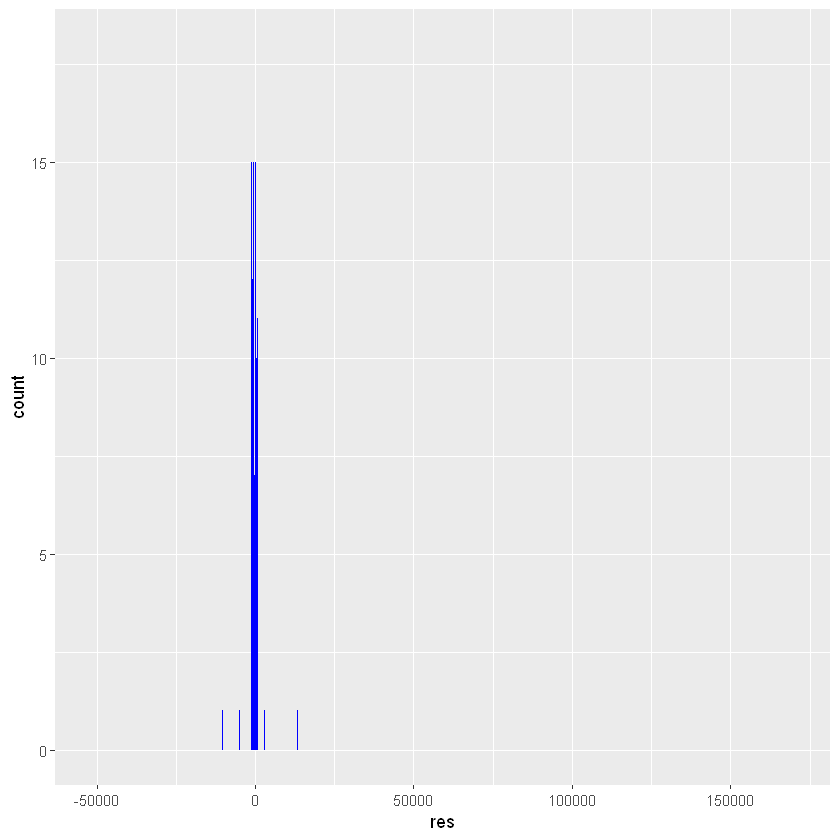

In [130]:
ggplot(res,aes(res))+geom_histogram(fill='blue',binwidth=30)

## Predicting

Predicting Profit from the model, we have built

In [140]:
prediction<-predict(model1,test)
result<-cbind(prediction,test$Profit)

In [141]:
colnames(result)<-c("pred","real")
result<-as.data.frame(result)

in a dataframe

In [142]:
head(result)

,pred,real
4,164844.6,182902.0
6,138617.7,156991.1
11,118970.8,146122.0
15,173995.5,132602.6
17,120052.6,126992.9
18,152560.4,125370.4


removing negatives

In [136]:
to_zero<-function(x)
{
    if(x<0)
    {
     return(0)
    }
    else
    {
     return(x)
    }
}

result$pred<-sapply(result$pred,to_zero)
head(result)

,pred,real
4,164844.6,182902.0
6,138617.7,156991.1
11,118970.8,146122.0
15,173995.5,132602.6
17,120052.6,126992.9
18,152560.4,125370.4


## Results

In [143]:
se<-(result$real-result$pred)^2
sse <- sum(se)
mse <- sse/nrow(result)

### Mean Square Error

In [144]:
print(mse)

[1] 134311938


### $R^2$

In [145]:
sse<-sum((result$pred-result$real)^2)
sst<-sum((result$pred-mean(result$pred))^2)
R2<-1-(sse/sst)
R2

[1] 0.9194407

# Conclusion

The model has $R^2$ of $91.94%$ which is almost close to 1, hence we can say that the other variables are able to describe the variable of Profit.